In [189]:
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import pandas as pd

In [191]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [193]:
dt = pd.read_csv('properties-cleaned-v5.csv')

In [195]:
dt.shape

(3604, 20)

In [197]:
dt.head(3)

,society,price,sector,pricePerSqft,propertyType,area,builtup,bedRooms,bathRooms,address,floorNum,agePossesion,balcony,pooja room,servant room,study room,others,store room,furnishType,luxuryScore
0,"palam vihar, gurgaon",4.26,sector 1,24027.07,house,1773.0,1773.0,6.0,6.0,"palam vihar, gurgaon",3.0,relatively new property,3,0,0,0,0,0,1,58
1,m3m woodshire,1.70,sector 107,8749.36,flat,1943.0,1554.4,3.0,3.0,"M3M Woodshire Sector 107, Gurgaon",7.0,relatively new property,1,0,0,0,0,0,1,77
2,central park flower valley aqua front towers,2.50,sector 33,13974.29,flat,1789.0,1431.2,3.0,3.0,Central Park Flower Valley Aqua Front Towers S...,5.0,relatively new property,3+,0,0,0,0,1,2,131


In [199]:
# for now i dont think society to be a important column
# and pricePerSqft and area too cause the user wont enter that 

In [201]:
trainDt = dt.drop(columns = ['society','pricePerSqft','area','address'])

<Axes: >

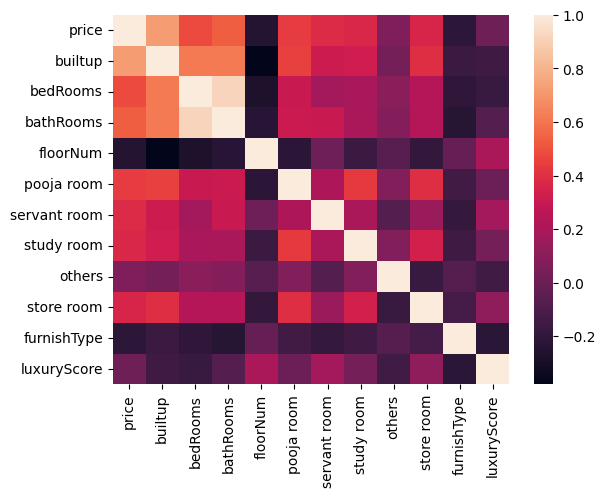

In [203]:
sns.heatmap(trainDt.select_dtypes(include = 'number').corr())

In [205]:
trainDt.select_dtypes(include = 'number').corr()['price'].sort_values(ascending = False)

price           1.000000
builtup         0.723160
bathRooms       0.534867
bedRooms        0.482150
pooja room      0.435815
servant room    0.383060
study room      0.374261
store room      0.363159
others          0.065179
luxuryScore     0.006004
furnishType    -0.214511
floorNum       -0.248648
Name: price, dtype: float64

NOTE,
 **we are not sure that price depends on**(right now in linear collinearity)

    -floorNum
    -furnishType
    -luxuryScore
    -others

# luxuryScore

    now the buyer wont know what is luxury score how much is 34 , 78 etc , so we will convert luxury score in a 
    categorical and ask him a choice between 3 types
    - budget 
    - semi luxurious 
    - luxurious

<Axes: xlabel='luxuryScore'>

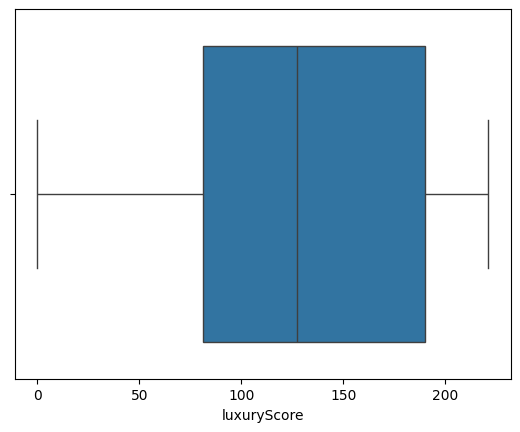

In [210]:
sns.boxplot(trainDt['luxuryScore'], orient = 'h')

In [212]:
def luxCat(val):
    if val <= 75:
        return 'budget'
    elif val > 75 and val <= 150:
        return 'semi luxurious'
    elif val > 150:
         return 'luxurious'

In [214]:
trainDt['luxCat'] = trainDt['luxuryScore'].apply(luxCat)

In [216]:
trainDt.sample(3)

,price,sector,propertyType,builtup,bedRooms,bathRooms,floorNum,agePossesion,balcony,pooja room,servant room,study room,others,store room,furnishType,luxuryScore,luxCat
3045,4.25,sector 78,house,4500.0,4.0,3.0,4.0,new property,2,0,1,0,0,0,2,84,semi luxurious
1436,4.60,sector 39,house,4500.0,6.0,5.0,3.0,old property,2,0,0,0,1,0,1,7,budget
169,11.95,sector 47,house,4509.0,5.0,6.0,3.0,relatively new property,3,1,1,0,0,1,1,190,luxurious


# floorNum

    same thing we will do with floorNum and divide in 3 categories 
    - low rise
    - mid rise
    - high rise

<Axes: xlabel='floorNum'>

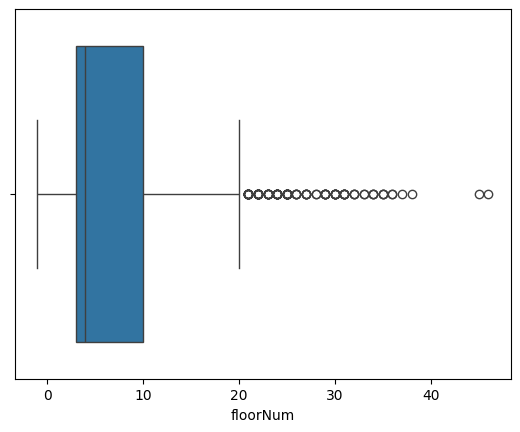

In [220]:
sns.boxplot(trainDt['floorNum'],orient = 'h')

In [222]:
def catFloor(val):
    if val>=1 and val<=3:
        return 'low rise'
    elif val>3 and val<=10:
        return 'mid rise'
    elif val > 10:
        return 'high rise'

In [224]:
trainDt['heightCat'] = trainDt['floorNum'].apply(catFloor)

In [226]:
# now we dont need these columns 
trainDt.drop(columns = ['floorNum','luxuryScore'],inplace = True)

In [228]:
trainDt.sample(3)

,price,sector,propertyType,builtup,bedRooms,bathRooms,agePossesion,balcony,pooja room,servant room,study room,others,store room,furnishType,luxCat,heightCat
3154,1.45,sector 102,flat,686.25,2.0,2.0,relatively new property,2,0,0,0,0,0,2,budget,mid rise
1281,1.70,sector 68,flat,952.50,2.0,2.0,relatively new property,1,0,0,0,0,0,0,luxurious,low rise
446,3.50,sector 104,flat,1960.00,3.0,4.0,relatively new property,3+,0,1,0,0,0,1,luxurious,mid rise


# Ordinal Encoding 
    Ordinal encoding is used to convert categorical variables with ordered categories 
    into integers that reflect their rank or order. It’s commonly used when the 
    categorical feature has a meaningful order (e.g., “low”, “medium”, “high”).

In [232]:
# so we willl do the same with our luxury height , property type and agepossession columns cause we need
# numerical columns for our feature selection and also to train our model 

dataLabelEncoded = trainDt.copy()

In [234]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [236]:
# getting all the columns we wanna encode 
columns = ['propertyType','agePossesion','balcony','luxCat','heightCat']

# creating a loop 
for cols in columns:
    dataLabelEncoded[cols] = encoder.fit_transform(dataLabelEncoded[[cols]])
    print(cols,'\t','\n')
    for i,data in enumerate(encoder.categories_[0]):
        print(f"{data} = {i} ")
    print('\n')

propertyType 	 

flat = 0 
house = 1 


agePossesion 	 

moderatly old property = 0 
new property = 1 
old property = 2 
relatively new property = 3 
under construction = 4 


balcony 	 

0 = 0 
1 = 1 
2 = 2 
3 = 3 
3+ = 4 


luxCat 	 

budget = 0 
luxurious = 1 
semi luxurious = 2 


heightCat 	 

high rise = 0 
low rise = 1 
mid rise = 2 
None = 3 




In [271]:
X_label = dataLabelEncoded.drop(columns = 'price')
Y_label = dataLabelEncoded['price']

In [240]:
# cleaning the sector column we just need the number of sector 

In [242]:
dataLabelEncoded['sector'] = dataLabelEncoded['sector'].str.replace('sector','').str.replace('block','').str.replace('pocket a','').str.replace(',','')

In [244]:
dataLabelEncoded['sector'] = dataLabelEncoded['sector'].str.replace('81a', '81').str.replace('72a', '72').str.replace('95b', '95').str.replace('9a', '9').str.replace('88b', '88').str.replace('Pocket C', '21').str.replace('Pocket E', '21').str.replace('Pocket H', '24').str.replace('Pocket I', '24').str.replace('DLF Phase 2', '25').str.replace('DLF Phase 3', '24').str.replace('New 1ar Phase 1', '24').str.replace('New 1ar Phase 2', '25').str.replace('New 1ar Phase 3', '24').str.replace('41', '41').str.replace('45', '45').str.replace('56', '56').str.replace('57', '57').str.replace('26', '26').str.replace('29', '29').str.replace('36', '36').str.replace('73', '73')


In [246]:
dataLabelEncoded['sector'] = dataLabelEncoded['sector'].str.replace('c  52','52').str.replace('e  56','56').str.replace('h  41','41').str.replace('c  52','52').str.replace('c  45','45').str.replace('c   43','43').str.replace(' 22b','22').str.replace(' 36 soh','36').str.replace('-35 soh','35').str.replace(' 73','73').str.replace('d  56','56').str.replace(' k  41','41').str.replace('1s','1')

In [248]:
dataLabelEncoded = dataLabelEncoded[dataLabelEncoded.groupby('sector')['sector'].transform('count') > 3 ]

In [250]:
dataLabelEncoded['sector'] = dataLabelEncoded['sector'].astype('int')

In [252]:
# now lets start with feature selection

# Method 1 - **correlational analysis**

<Axes: >

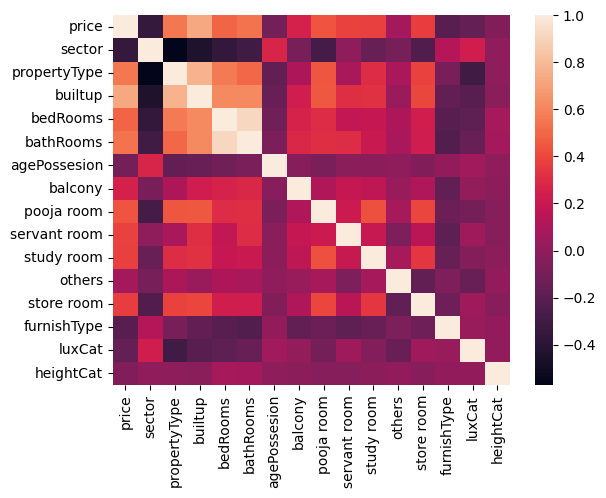

In [255]:
sns.heatmap(dataLabelEncoded.corr())

In [257]:
fi_df1 = dataLabelEncoded.corr()['price'].sort_values(ascending = False).to_frame().reset_index().rename(
    columns = {'index':'features','price':'corr_coeff'})

fi_df1.drop(index = 0 , inplace = True)

In [259]:
fi_df1

,features,corr_coeff
1,builtup,0.726019
2,propertyType,0.553709
3,bathRooms,0.538117
4,bedRooms,0.484997
5,pooja room,0.438488
6,servant room,0.381892
7,study room,0.373362
8,store room,0.367571
9,balcony,0.252273
10,others,0.068939


In [261]:
# this corr function gives a linear relation

# Method 2 - 

# RANDOM forest feature importance 

In [273]:
from sklearn.ensemble import RandomForestRegressor 
obj = RandomForestRegressor(n_estimators = 101 , random_state = 42)
obj.fit(X_label , Y_label)

,n_estimators,101
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [275]:
fi_df2 = pd.DataFrame({'features':X_label.columns , 'rf_imp':obj.feature_importances_}).sort_values(
    by = 'rf_imp' , ascending = False)

In [277]:
fi_df2

,features,rf_imp
2,builtup,0.592970
0,sector,0.113129
8,servant room,0.081221
4,bathRooms,0.038740
3,bedRooms,0.038434
12,furnishType,0.023002
13,luxCat,0.021218
5,agePossesion,0.020257
6,balcony,0.017435
9,study room,0.014963


# Technique 3
# gradient boosting feature importances

In [280]:
from sklearn.ensemble import GradientBoostingRegressor
obj = GradientBoostingRegressor()
obj.fit(X_label , Y_label)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [281]:
fi_df3 = pd.DataFrame({'features':X_label.columns , 'gb_imp':obj.feature_importances_}).sort_values(
    by = 'gb_imp' , ascending = False)

In [284]:
fi_df3

,features,gb_imp
2,builtup,0.670527
8,servant room,0.094749
0,sector,0.081132
3,bedRooms,0.051362
4,bathRooms,0.036317
9,study room,0.025212
12,furnishType,0.008356
13,luxCat,0.008173
5,agePossesion,0.006168
6,balcony,0.005881


# Technique 4
# permutation importance

In [287]:
from sklearn.inspection import permutation_importance 
from sklearn.model_selection import train_test_split

xTrain,xTest,yTrain,yTest = train_test_split(X_label , Y_label , test_size = 0.2 , random_state = 42)

baseEstimator = RandomForestRegressor(n_estimators = 101)
baseEstimator.fit(xTrain,yTrain)

# to calculate the permuataion importace
permImp = permutation_importance(baseEstimator , xTest , yTest , n_repeats = 51 , random_state = 42)
#n_repeats = to how many times we want to repeat this process again to agian to be sure

In [288]:
fi_df4 = pd.DataFrame({'features':X_label.columns , 'per_imp':permImp.importances_mean}).sort_values(
    by = 'per_imp' , ascending = False)
fi_df4

,features,per_imp
2,builtup,0.795416
8,servant room,0.185389
0,sector,0.134035
4,bathRooms,0.032064
9,study room,0.025576
13,luxCat,0.021329
3,bedRooms,0.020289
12,furnishType,0.014609
1,propertyType,0.009533
6,balcony,0.008504


In [289]:
# tree based models are more reliable but still we will use just 2 linear models 

# Technique 5 
# LASSO

In [291]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xscaled = scaler.fit_transform(X_label)

obj = Lasso(alpha = 0.01 , random_state = 42)
obj.fit(Xscaled,Y_label)

,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,42
,selection,'cyclic'


In [292]:
fi_df5 = pd.DataFrame({'features':X_label.columns, 'lasso_imp':obj.coef_}).sort_values(
    by = 'lasso_imp' , ascending = False)

In [293]:
fi_df5

,features,lasso_imp
2,builtup,2.586702
4,bathRooms,1.235564
8,servant room,0.629711
9,study room,0.468623
7,pooja room,0.308246
11,store room,0.300657
6,balcony,0.218887
10,others,0.213869
1,propertyType,-0.000000
5,agePossesion,-0.000000


# Technique 6 
# LinearReg weights

In [295]:
from sklearn.linear_model import LinearRegression 

obj = LinearRegression()
obj.fit(Xscaled , Y_label) 

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [296]:
fi_df6 = pd.DataFrame({ 'features':X_label.columns , 'linReg_imp':obj.coef_}).sort_values(
    by = 'linReg_imp' , ascending = False)

fi_df6

,features,linReg_imp
2,builtup,2.611494
4,bathRooms,1.359327
8,servant room,0.618590
9,study room,0.472656
11,store room,0.313344
7,pooja room,0.311132
10,others,0.225593
6,balcony,0.223937
5,agePossesion,-0.000470
1,propertyType,-0.034386


# Technique 7 
# RFE (recursive feature elimination)

In [298]:
from sklearn.feature_selection import RFE

baseEstimator = RandomForestRegressor(n_estimators = 111 , random_state = 42)
baseEstimator.fit(X_label , Y_label)

#RFE object
RFEobj = RFE(baseEstimator , n_features_to_select = X_label.shape[1] , step = 1)
RFEobj.fit(X_label,Y_label)

# selected cols 
cols = X_label.columns[RFEobj.support_]

fi_df7 = pd.DataFrame({'features' : cols , 'RFE_imp':RFEobj.estimator.feature_importances_}).sort_values(
    by = 'RFE_imp' , ascending = False)

In [299]:
fi_df7

,features,RFE_imp
2,builtup,0.593227
0,sector,0.113305
8,servant room,0.081391
3,bedRooms,0.038653
4,bathRooms,0.038444
12,furnishType,0.022957
13,luxCat,0.021148
5,agePossesion,0.020240
6,balcony,0.017379
9,study room,0.014829


# Teachnique 8 
# SHAP

In [301]:
!pip install SHAP

In [302]:
import shap

In [303]:
explainer = shap.TreeExplainer(baseEstimator)
# using the old Random Forest already trained model as based estimator

shapValues = explainer.shap_values(X_label)

#summing the absolute Shap values across alll samples to get an overall measure of feature importance
shap_sum = np.abs(shapValues).mean(axis = 0 )


In [304]:
fi_df8 = pd.DataFrame({
    'features':X_label.columns , 'shap_score':shap_sum}).sort_values( by = 'shap_score' , 
                                                                     ascending = False)
fi_df8

,features,shap_score
2,builtup,2.716464
8,servant room,0.740649
0,sector,0.673162
4,bathRooms,0.249264
9,study room,0.212257
13,luxCat,0.172956
3,bedRooms,0.148615
6,balcony,0.093131
14,heightCat,0.091500
12,furnishType,0.087205


In [306]:
finalDf = fi_df1.merge(fi_df2,on='features').merge(fi_df3,
     on='features').merge(fi_df4,on='features').merge(fi_df5,on='features').merge(fi_df6,
     on='features').merge(fi_df7,on='features').merge(fi_df8,on='features')

In [307]:
finalDf.set_index('features',drop=True,inplace=True)
finalDf

,corr_coeff,rf_imp,gb_imp,per_imp,lasso_imp,linReg_imp,RFE_imp,shap_score
features,,,,,,,,
builtup,0.726019,0.592970,0.670527,0.795416,2.586702,2.611494,0.593227,2.716464
propertyType,0.553709,0.003729,0.003244,0.009533,-0.000000,-0.034386,0.003827,0.041125
bathRooms,0.538117,0.038740,0.036317,0.032064,1.235564,1.359327,0.038444,0.249264
bedRooms,0.484997,0.038434,0.051362,0.020289,-0.851391,-0.986470,0.038653,0.148615
pooja room,0.438488,0.007697,0.002254,0.003375,0.308246,0.311132,0.007635,0.030521
servant room,0.381892,0.081221,0.094749,0.185389,0.629711,0.618590,0.081391,0.740649
study room,0.373362,0.014963,0.025212,0.025576,0.468623,0.472656,0.014829,0.212257
store room,0.367571,0.007856,0.001341,0.002377,0.300657,0.313344,0.007776,0.039456
balcony,0.252273,0.017435,0.005881,0.008504,0.218887,0.223937,0.017379,0.093131


In [308]:
# some values are above the 1 , so normalising 
finalDf = (finalDf - finalDf.min()) / (finalDf.max() - finalDf.min())

In [309]:
finalDf

,corr_coeff,rf_imp,gb_imp,per_imp,lasso_imp,linReg_imp,RFE_imp,shap_score
features,,,,,,,,
builtup,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
propertyType,0.839916,0.000000,0.004478,0.010028,0.247635,0.264617,0.000000,0.006515
bathRooms,0.825430,0.059417,0.053820,0.038410,0.607010,0.651979,0.058733,0.083807
bedRooms,0.776079,0.058899,0.076265,0.023577,0.000000,0.000000,0.059087,0.046432
pooja room,0.732870,0.006734,0.003000,0.002270,0.337291,0.360649,0.006462,0.002578
servant room,0.680290,0.131512,0.140994,0.231552,0.430792,0.446102,0.131598,0.266283
study room,0.672365,0.019065,0.037251,0.030237,0.383938,0.405542,0.018666,0.070065
store room,0.666985,0.007005,0.001637,0.001013,0.335084,0.361264,0.006701,0.005895
balcony,0.559868,0.023261,0.008411,0.008731,0.311300,0.336415,0.022993,0.025828


In [310]:
finalDf['average'] = finalDf.mean(axis = 1)

In [311]:
finalDf['average'].sort_values(ascending = False)

features
builtup         1.000000
servant room    0.307390
bathRooms       0.297326
study room      0.204641
pooja room      0.181482
store room      0.173198
propertyType    0.171649
balcony         0.162101
sector          0.161586
others          0.130856
bedRooms        0.130042
agePossesion    0.104960
heightCat       0.095948
luxCat          0.094854
furnishType     0.084506
Name: average, dtype: float64

In [312]:
# i will drop furnish type col cause it has least score 
# but we have to prove that removing this col wont affect the accuracy of my model in future 
# hence i will train a model with all cols then train another after droppong the furnish type 
# if the score is similar then we will drop it 

In [313]:
model = RandomForestRegressor(n_estimators = 101,random_state = 42) 

In [314]:
from sklearn.model_selection import cross_val_score 
score = cross_val_score(model,X_label,Y_label,cv=5,scoring='r2')

In [315]:
score.mean()

0.7414309832198072

In [316]:
# now after deleting the furnishType

In [317]:
tempdf = X_label.drop(columns = 'furnishType')

In [318]:
score2 = cross_val_score(model , tempdf , Y_label , cv = 5 , scoring = 'r2')

In [319]:
score2.mean()

0.7372590459940491

In [320]:
# so no great diff hence we can drop it 

In [321]:
dataset = X_label.drop(columns = 'furnishType')
dataset['Y'] = Y_label

In [322]:
dataset.to_csv('dataset-v6.csv')